# 2.1.1 Intro

### 호주 방문자 수 그래프

#### 필요한 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### 데이터 불러오기

In [2]:
austa = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/aus_visit.csv',index_col=0)
austa['Month'] = pd.to_datetime(austa['Month'])

#### 학습 데이터 분리

In [3]:
austa_up_to_2010 = austa[austa['Month'] <= '2010-12-31']

#### 모델 피팅

In [4]:
model = ExponentialSmoothing(austa_up_to_2010['Visitors'], seasonal='add', seasonal_periods=12).fit()

C:\Users\Seungyun\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


#### 시뮬레이션 예측

In [5]:
forecast_start_date = '2011-01-01'
forecast_steps = 48  
num_simulations = 100
prediction = model.forecast(steps=forecast_steps)

np.random.seed(1967)
simulated_paths = pd.DataFrame()
residual_std = model.resid.std()

for i in range(num_simulations):
    new_residuals = np.random.normal(0, residual_std, size=forecast_steps)
    simulated_forecast = prediction + new_residuals
    simulated_df = pd.DataFrame({
        'Month': pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='M'),
        'Visitors': simulated_forecast,
        'Simulation': i + 1
    })
    simulated_paths = pd.concat([simulated_paths, simulated_df], ignore_index=True)

#### 시각화

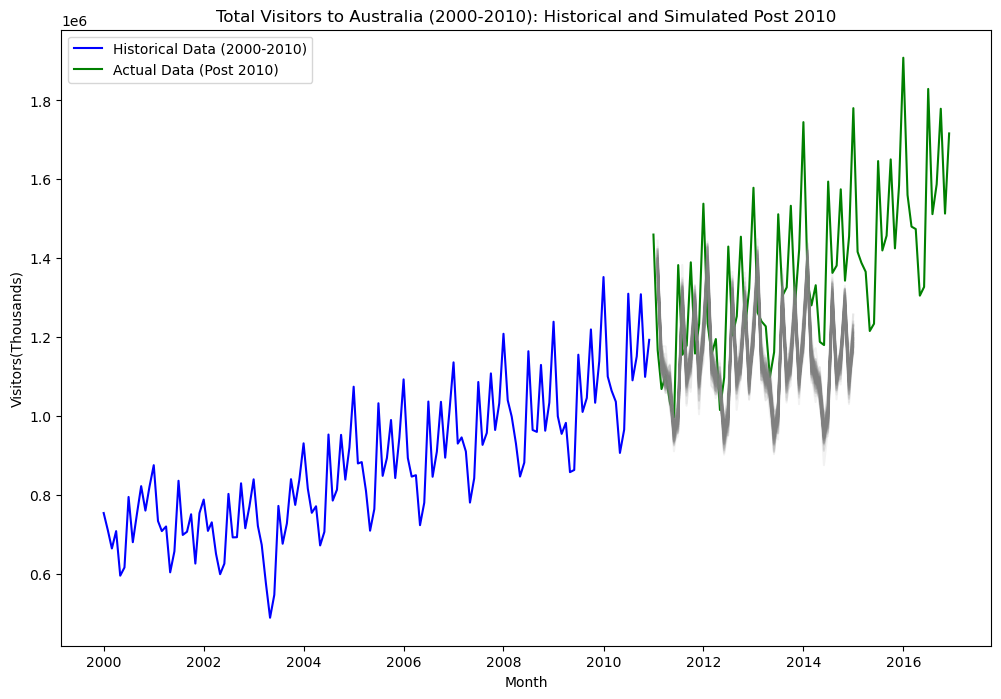

In [6]:
plt.figure(figsize=(12, 8))
austa_filtered = austa[(austa['Month'] >= '2000-01-01') & (austa['Month'] <= '2010-12-31')]
actual_post_2010 = austa[(austa['Month'] > '2010-12-31')& (austa['Month'] <= '2016-12-31')]
sns.lineplot(data=austa_filtered, x='Month', y='Visitors', label='Historical Data (2000-2010)', color='blue')
sns.lineplot(data=actual_post_2010, x='Month', y='Visitors', label='Actual Data (Post 2010)', color='green')

for i in range(1, num_simulations+1):
    sim_data = simulated_paths[simulated_paths['Simulation'] == i]
    sns.lineplot(data=sim_data, x='Month', y='Visitors', color='gray', alpha=0.1)
    
plt.title("Total Visitors to Australia (2000-2010): Historical and Simulated Post 2010")
plt.xlabel("Month")
plt.ylabel("Visitors(Thousands)")
plt.legend()
plt.show()

# 2.1.4 예측 평가 

## 확률적 예측

### 호주 방문자 수의 확률적 예측 

### 필요한 패키지 불러오기

In [7]:
import matplotlib.pyplot as plt
import numpy as np

### 데이터 불러오기

In [8]:
austa = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.2/aus_visit.csv',index_col=0)
austa['Month'] = pd.to_datetime(austa['Month'])

### 학습 데이터 분리

In [9]:
austa_up_to_2010 = austa[austa['Month'] <= '2010-12-31']

### 확률적 예측

In [10]:
austa_up_to_2010.set_index('Month', inplace=True)
rolling_window = 12 
median_forecast = austa_up_to_2010['Visitors'].rolling(window=rolling_window).median()
p90_forecast = austa_up_to_2010['Visitors'].rolling(window=rolling_window).quantile(0.9)
p10_forecast = austa_up_to_2010['Visitors'].rolling(window=rolling_window).quantile(0.1)

### 데이터 시각화

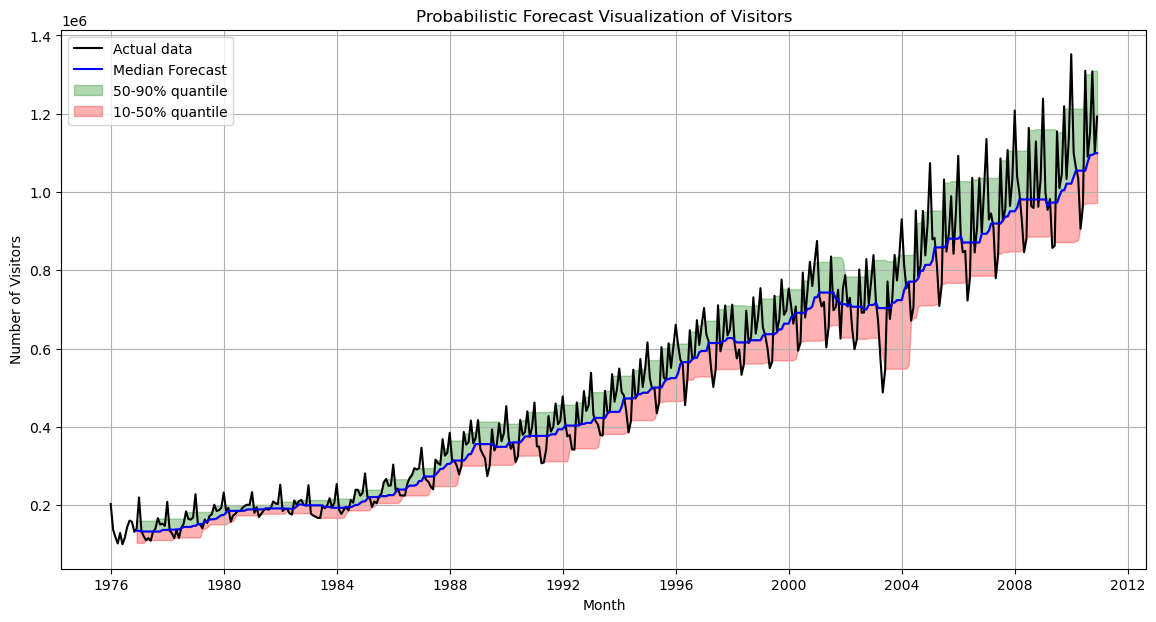

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(austa_up_to_2010.index, austa_up_to_2010['Visitors'], label='Actual data', color='black')
plt.plot(austa_up_to_2010.index, median_forecast, label='Median Forecast', color='blue')
plt.fill_between(austa_up_to_2010.index, median_forecast, p90_forecast, color='green', alpha=0.3, label='50-90% quantile')
plt.fill_between(austa_up_to_2010.index, median_forecast, p10_forecast, color='red', alpha=0.3, label='10-50% quantile')

plt.grid(True)
plt.title('Probabilistic Forecast Visualization of Visitors')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.legend()
plt.show()